<a href="https://colab.research.google.com/github/skywalker0803r/Ricky/blob/master/%E7%8E%89%E5%B1%B1%E9%8A%80%E8%A1%8CAI%E6%AF%94%E8%B3%BD_featuresengineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import gc
import warnings 
warnings.simplefilter('ignore')
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# 中文map

In [0]:
中文map = {'bacno':'歸戶帳號','txkey':'交易序號','locdt':'授權日期','loctm':'授權時間','cano':'交易卡號',
         'contp':'交易類別','etymd':'交易型態','mchno':'特店代號','acqic':'收單行代碼','mcc':'MCC_CODE',
         'conam':'交易金額-台幣(經過轉換)','ecfg':'網路交易註記','insfg':'分期交易註記','iterm':'分期期數',
         'stocn':'消費地國別','scity':'消費城市','stscd':'狀態碼','ovrlt':'超額註記碼','flbmk':'Fallback註記',
         'hcefg':'支付型態','csmcu':'消費地幣別','flg_3dsmk':'3DS交易註記','fraud_ind':'盜刷註記'}

# train data

In [3]:
import pandas as pd
train = pd.read_csv("/content/drive/My Drive/玉山人工智慧比賽數據/train_預處理完.csv",index_col=0)
train_fraud_ind = train['fraud_ind']
train_txkey = train['txkey']
print(train.shape)
train.head()

(1521787, 23)


,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,hcefg,insfg,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey,fraud_ind
0,6862,112785,37846,16158,5,0,0,0,0,0,5,0,0,33,61954,457,59034,0,0,102,0,516056,0
1,0,133951,45476,13693,5,0,0,2,0,0,0,0,0,9,38216,451,0,0,5795,102,0,4376,0
2,6862,15350,187354,16158,5,0,0,0,0,0,5,0,0,6,54640,457,59034,0,0,102,0,483434,0
3,6697,156492,29812,40413,5,62,0,5,0,0,5,0,0,5,62128,247,50185,0,3267,102,0,1407164,0
4,5959,105534,80881,25962,5,62,0,4,0,0,5,0,0,6,65231,263,93290,0,5795,102,0,1051004,0


# test data

In [4]:
test = pd.read_csv("/content/drive/My Drive/玉山人工智慧比賽數據/test_預處理完.csv",index_col=0)
test_txkey = test['txkey']
print(test.shape)
test.head()

(421665, 22)


,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,hcefg,insfg,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
0,6862,162489,116168,16158,5,0,0,0,0,0,5,0,0,102,77950,457,59060,0,0,102,0,592489
1,6862,162489,116168,16158,5,0,0,0,0,0,5,0,0,102,79549,457,59060,0,0,102,0,592452
2,6862,162489,116168,16158,5,0,0,0,0,0,5,0,0,100,60355,457,59060,0,0,102,0,590212
3,6862,162489,116168,16158,5,0,0,0,0,0,5,0,0,100,60296,457,59060,0,0,102,0,590209
4,6862,162489,116168,16158,5,0,0,0,0,0,5,0,0,102,77933,457,59060,0,0,102,0,592488


# full data

In [5]:
full_data  = train.drop('fraud_ind',axis=1).append(test)
print(full_data.shape)
print(full_data.isnull().sum().sum())
full_data.head()

(1943452, 22)
0


,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,hcefg,insfg,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
0,6862,112785,37846,16158,5,0,0,0,0,0,5,0,0,33,61954,457,59034,0,0,102,0,516056
1,0,133951,45476,13693,5,0,0,2,0,0,0,0,0,9,38216,451,0,0,5795,102,0,4376
2,6862,15350,187354,16158,5,0,0,0,0,0,5,0,0,6,54640,457,59034,0,0,102,0,483434
3,6697,156492,29812,40413,5,62,0,5,0,0,5,0,0,5,62128,247,50185,0,3267,102,0,1407164
4,5959,105534,80881,25962,5,62,0,4,0,0,5,0,0,6,65231,263,93290,0,5795,102,0,1051004


# full data col's unique

In [6]:
name = []
len_u = []
sample_v = []
中文 = []
for col in full_data.columns:
  name.append(col)
  u = full_data[col].unique()
  len_u.append(len(u))
  sample_v.append(u[:5])
  中文.append(pd.Series([col]).map(中文map).values[0])
table = pd.DataFrame({'name':name,'中文':中文,'len_u':len_u,'sample_v':sample_v})
table

,name,中文,len_u,sample_v
0,acqic,收單行代碼,6866,"[6862, 0, 6697, 5959, 6394]"
1,bacno,歸戶帳號,163185,"[112785, 133951, 15350, 156492, 105534]"
2,cano,交易卡號,212458,"[37846, 45476, 187354, 29812, 80881]"
3,conam,交易金額-台幣(經過轉換),86327,"[16158, 13693, 40413, 25962, 68123]"
4,contp,交易類別,7,"[5, 3, 6, 2, 4]"
5,csmcu,消費地幣別,76,"[0, 62, 74, 61, 13]"
6,ecfg,網路交易註記,2,"[0, 1]"
7,etymd,交易型態,11,"[0, 2, 5, 4, 8]"
8,flbmk,Fallback註記,3,"[0, 1, 2]"
9,flg_3dsmk,3DS交易註記,3,"[0, 1, 2]"


# EDA

把數據分組 一組的值在value內 一組的值在value外,看兩組的KDE分布

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def kdeplotByGroup(df,x_col,y_col,group_value):
  sns.kdeplot(df.loc[df[x_col].isin(group_value),y_col],label='isin_group')
  sns.kdeplot(df.loc[~df[x_col].isin(group_value),y_col],label='notin_group')
  plt.legend()
  plt.show()

def kdeplotByValue(df,x_col,y_col):
  g1 = df.loc[df[x_col] > df[x_col].mean(),y_col]
  g2 = df.loc[df[x_col] < df[x_col].mean(),y_col]
  sns.kdeplot(g1,label=x_col+'>AVG')
  sns.kdeplot(g2,label=x_col+'<AVG')
  print(x_col+' >AVG '+y_col+' AVG:',round(np.mean(g1)*100,2),'%')
  print(x_col+' <AVG '+y_col+' AVG:',round(np.mean(g2)*100,2),'%')
  plt.legend()
  plt.show()  

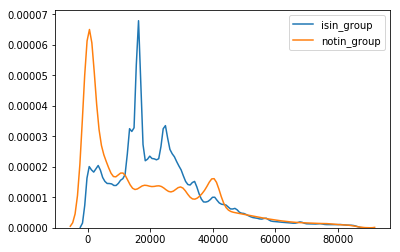

In [8]:
value = [0,20,34,41,55,68,72,75,81,83,87,89,102,106,107]
kdeplotByGroup(train,'stocn','conam',value)

# 定義特徵 去除fraud_ind,txkey,locdt,其他都當特徵

In [9]:
features = full_data.drop(['txkey','locdt'],axis=1).columns.tolist()
print(len(features))
print(features)

20
['acqic', 'bacno', 'cano', 'conam', 'contp', 'csmcu', 'ecfg', 'etymd', 'flbmk', 'flg_3dsmk', 'hcefg', 'insfg', 'iterm', 'loctm', 'mcc', 'mchno', 'ovrlt', 'scity', 'stocn', 'stscd']


# Function for Numeric Aggregations

count nunique

In [0]:
def agg_function(df,group_var,features):
    agg = df[features+[group_var]].groupby(group_var).agg(["nunique"]).reset_index()
    columns = [group_var]
    for var in agg.columns.levels[0]:
      if var != group_var:
        for stat in agg.columns.levels[1][:-1]:
          columns.append('%s_%s_%s' % (group_var,var,stat))
    agg.columns = columns
    return agg

# Function to Handle Categorical Variables

count norm_count

In [0]:
def count_categorical(df, group_var,categorical_features):
    categorical = pd.get_dummies(df[categorical_features],columns=categorical_features)
    categorical[group_var] = df[group_var]
    categorical = categorical.groupby(group_var).agg(['mean'])
    column_names = []
    for var in categorical.columns.levels[0]:
      for stat in ['norm_count']:
        column_names.append('%s_%s_%s' % (group_var, var, stat))
    categorical.columns = column_names
    return categorical

# groupby id_col 然後去計算nunique,norm_count

例如cano對bacno算nunique,若一張卡片的歸戶帳號有超過一個以上,其中一個是用戶本人的,那另外一個可能是歹徒的

若cano的stscd的nunique太多,代表該張卡片使用上有很多種狀態碼,也許是個判斷準則

id欄位有'cano','mchno','bacno','acqic',其中cano卡片代號和bacno歸戶帳號,比較唯一用來當id_col比較適合

# cano

In [12]:
from tqdm import tqdm_notebook as tqdm

id_cols = ['cano'] 
nunique_col = ['bacno','acqic','mchno','stscd','contp','hcefg','iterm','ovrlt','etymd','csmcu','mcc','stocn','scity'] # for count nunique
norm_count_col = ['stscd','contp','hcefg','iterm','ovrlt','etymd'] # for count each values's norm_count will one hot

for id_col in tqdm(id_cols):
  full_data = full_data.merge(agg_function(full_data,id_col,nunique_col) ,on = id_col ,how = 'left')
  print(full_data.shape)
  full_data = full_data.merge(count_categorical(full_data,id_col,norm_count_col) ,on = id_col ,how = 'left')
  print(full_data.shape)
  gc.collect()
gc.collect()

(1943452, 35)
(1943452, 79)



0

# bacno

In [13]:
#改用bacno當id_col
id_cols = ['bacno']

#把原本nunique_col的bacno改成cano
nunique_col = ['cano','acqic','mchno','stscd','contp','hcefg','iterm','ovrlt','etymd','csmcu','mcc','stocn','scity'] # for count nunique
norm_count_col = ['stscd','contp','hcefg','iterm','ovrlt','etymd'] # for count each values's norm_count will one hot

for id_col in tqdm(id_cols):
  full_data = full_data.merge(agg_function(full_data,id_col,nunique_col) ,on = id_col ,how = 'left')
  print(full_data.shape)
  full_data = full_data.merge(count_categorical(full_data,id_col,norm_count_col) ,on = id_col ,how = 'left')
  print(full_data.shape)
  gc.collect()
gc.collect()

(1943452, 92)
(1943452, 136)



0

# acqic

In [14]:
#改用acqic當id_col
id_cols = ['acqic']

#把原本nunique_col的acqic改成bacno
nunique_col = ['cano','bacno','mchno','stscd','contp','hcefg','iterm','ovrlt','etymd','csmcu','mcc','stocn','scity'] # for count nunique
norm_count_col = ['stscd','contp','hcefg','iterm','ovrlt','etymd'] # for count each values's norm_count will one hot

for id_col in tqdm(id_cols):
  full_data = full_data.merge(agg_function(full_data,id_col,nunique_col) ,on = id_col ,how = 'left')
  print(full_data.shape)
  full_data = full_data.merge(count_categorical(full_data,id_col,norm_count_col) ,on = id_col ,how = 'left')
  print(full_data.shape)
  gc.collect()
gc.collect()

(1943452, 149)
(1943452, 193)



0

# mchno

In [15]:
id_cols = ['mchno']

nunique_col = ['cano','bacno','acqic','stscd','contp','hcefg','iterm','ovrlt','etymd','csmcu','mcc','stocn','scity'] # for count nunique
norm_count_col = ['stscd','contp','hcefg','iterm','ovrlt','etymd'] # for count each values's norm_count will one hot

for id_col in tqdm(id_cols):
  full_data = full_data.merge(agg_function(full_data,id_col,nunique_col) ,on = id_col ,how = 'left')
  print(full_data.shape)
  full_data = full_data.merge(count_categorical(full_data,id_col,norm_count_col) ,on = id_col ,how = 'left')
  print(full_data.shape)
  gc.collect()
gc.collect()

(1943452, 206)
(1943452, 250)



0

# check

In [16]:
print(full_data.shape)
print(full_data.isnull().sum().sum())
full_data.head()

(1943452, 250)
0


,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,hcefg,insfg,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey,cano_bacno_nunique,cano_acqic_nunique,cano_mchno_nunique,cano_stscd_nunique,cano_contp_nunique,cano_hcefg_nunique,cano_iterm_nunique,cano_ovrlt_nunique,cano_etymd_nunique,cano_csmcu_nunique,cano_mcc_nunique,cano_stocn_nunique,cano_scity_nunique,cano_stscd_0_norm_count,cano_stscd_1_norm_count,cano_stscd_2_norm_count,cano_stscd_3_norm_count,cano_stscd_4_norm_count,...,mchno_stscd_4_norm_count,mchno_contp_0_norm_count,mchno_contp_1_norm_count,mchno_contp_2_norm_count,mchno_contp_3_norm_count,mchno_contp_4_norm_count,mchno_contp_5_norm_count,mchno_contp_6_norm_count,mchno_hcefg_0_norm_count,mchno_hcefg_1_norm_count,mchno_hcefg_2_norm_count,mchno_hcefg_3_norm_count,mchno_hcefg_4_norm_count,mchno_hcefg_5_norm_count,mchno_hcefg_6_norm_count,mchno_hcefg_7_norm_count,mchno_hcefg_8_norm_count,mchno_hcefg_9_norm_count,mchno_iterm_0_norm_count,mchno_iterm_1_norm_count,mchno_iterm_2_norm_count,mchno_iterm_3_norm_count,mchno_iterm_4_norm_count,mchno_iterm_5_norm_count,mchno_iterm_6_norm_count,mchno_iterm_7_norm_count,mchno_iterm_8_norm_count,mchno_ovrlt_0_norm_count,mchno_ovrlt_1_norm_count,mchno_etymd_0_norm_count,mchno_etymd_1_norm_count,mchno_etymd_2_norm_count,mchno_etymd_3_norm_count,mchno_etymd_4_norm_count,mchno_etymd_5_norm_count,mchno_etymd_6_norm_count,mchno_etymd_7_norm_count,mchno_etymd_8_norm_count,mchno_etymd_9_norm_count,mchno_etymd_10_norm_count
0,6862,112785,37846,16158,5,0,0,0,0,0,5,0,0,33,61954,457,59034,0,0,102,0,516056,1,18,33,1,3,2,1,1,5,3,21,5,13,1.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.000000,0.0,1.000000,0.000000,0.000728,0.000000,0.000000,0.0,0.0,0.989928,0.009344,0.0,0.000000,0.0,1.000000,0.000000,0.000000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.985317,0.014683,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0
1,0,133951,45476,13693,5,0,0,2,0,0,0,0,0,9,38216,451,0,0,5795,102,0,4376,1,7,11,1,1,2,2,1,4,2,8,1,4,1.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.031717,0.0,0.968283,0.000000,0.911000,0.039878,0.002715,0.0,0.0,0.034542,0.004771,0.0,0.007094,0.0,1.000000,0.000000,0.000000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.992090,0.007910,0.024906,0.0,0.894976,0.000016,0.028673,0.049750,0.0,0.0,0.000188,0.001491,0.0
2,6862,15350,187354,16158,5,0,0,0,0,0,5,0,0,6,54640,457,59034,0,0,102,0,483434,1,7,12,1,1,2,1,1,4,2,7,1,4,1.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.000000,0.0,1.000000,0.000000,0.000728,0.000000,0.000000,0.0,0.0,0.989928,0.009344,0.0,0.000000,0.0,1.000000,0.000000,0.000000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.985317,0.014683,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0
3,6697,156492,29812,40413,5,62,0,5,0,0,5,0,0,5,62128,247,50185,0,3267,102,0,1407164,1,7,25,1,2,1,2,1,4,1,12,1,7,1.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.000000,0.0,0.989076,0.010924,0.000000,0.012910,0.002979,0.0,0.0,0.984111,0.000000,0.0,0.000000,0.0,0.861966,0.059583,0.055611,0.00993,0.01291,0.0,0.0,0.0,0.0,0.987090,0.012910,0.000000,0.0,0.009930,0.000993,0.525323,0.455809,0.0,0.0,0.000000,0.007944,0.0
4,5959,105534,80881,25962,5,62,0,4,0,0,5,0,0,6,65231,263,93290,0,5795,102,0,1051004,1,11,28,1,3,2,1,1,5,2,16,1,8,1.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.000000,0.00000,0.00000,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0


# 拆回train and test

In [17]:
train = full_data.loc[full_data['txkey'].isin(train_txkey),:]
train['fraud_ind'] = train_fraud_ind
print(train.shape)

(1521787, 251)


In [18]:
test = full_data.loc[full_data['txkey'].isin(test_txkey),:]
print(test.shape)

(421665, 250)


In [19]:
del full_data
gc.collect()

0

# Correlation Function

In [0]:
# Function to calculate correlations with the target for a dataframe
def target_corrs(df,feats):
  corrs = {} 
  for col in feats:
    corr = df['fraud_ind'].corr(df[col])
    corrs[col] = abs(corr)
  return pd.DataFrame(corrs,index=['corr_score']).T.sort_values(by='corr_score',ascending=False)

In [21]:
#原始特徵
old_corrs = target_corrs(train,features)
old_corrs.head(10)

,corr_score
stscd,0.279225
ecfg,0.161701
stocn,0.161405
acqic,0.083764
etymd,0.067743
loctm,0.041972
scity,0.028736
hcefg,0.026210
contp,0.023248
conam,0.022302


# 這裡希望新特徵的corr_score超過原始特徵

In [22]:
#新特徵
new_feats = list(set(train.drop(['fraud_ind','txkey'],axis=1).columns)^set(features))
new_corrs = target_corrs(train,new_feats)
new_corrs.head(10)

,corr_score
mchno_stscd_2_norm_count,0.435368
mchno_stscd_0_norm_count,0.431845
acqic_stscd_2_norm_count,0.395115
acqic_stscd_0_norm_count,0.394863
cano_stscd_2_norm_count,0.276119
cano_stscd_0_norm_count,0.273667
acqic_scity_nunique,0.212244
acqic_csmcu_nunique,0.209596
bacno_stscd_2_norm_count,0.194635
bacno_stscd_0_norm_count,0.193015


# after we add some new_features check the new features's kdeplot

mchno_stscd_2_norm_count >AVG fraud_ind AVG: 11.2 %
mchno_stscd_2_norm_count <AVG fraud_ind AVG: 0.19 %


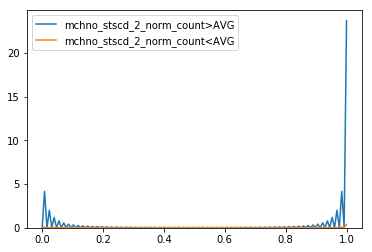

In [23]:
kdeplotByValue(train,new_corrs.head(1).index.values[0],'fraud_ind')

# 篩選新特徵

從原始特徵選前幾名,也從新特徵選前幾名

In [0]:
old_feat_num = len(features)
new_feat_num = 100

select_feats = list(old_corrs.head(old_feat_num).index)+list(new_corrs.head(new_feat_num).index)
train = train[select_feats+['txkey']+['fraud_ind']]
test = test[select_feats+['txkey']]

# select_feats's corr

看看特徵之間是否有共線性

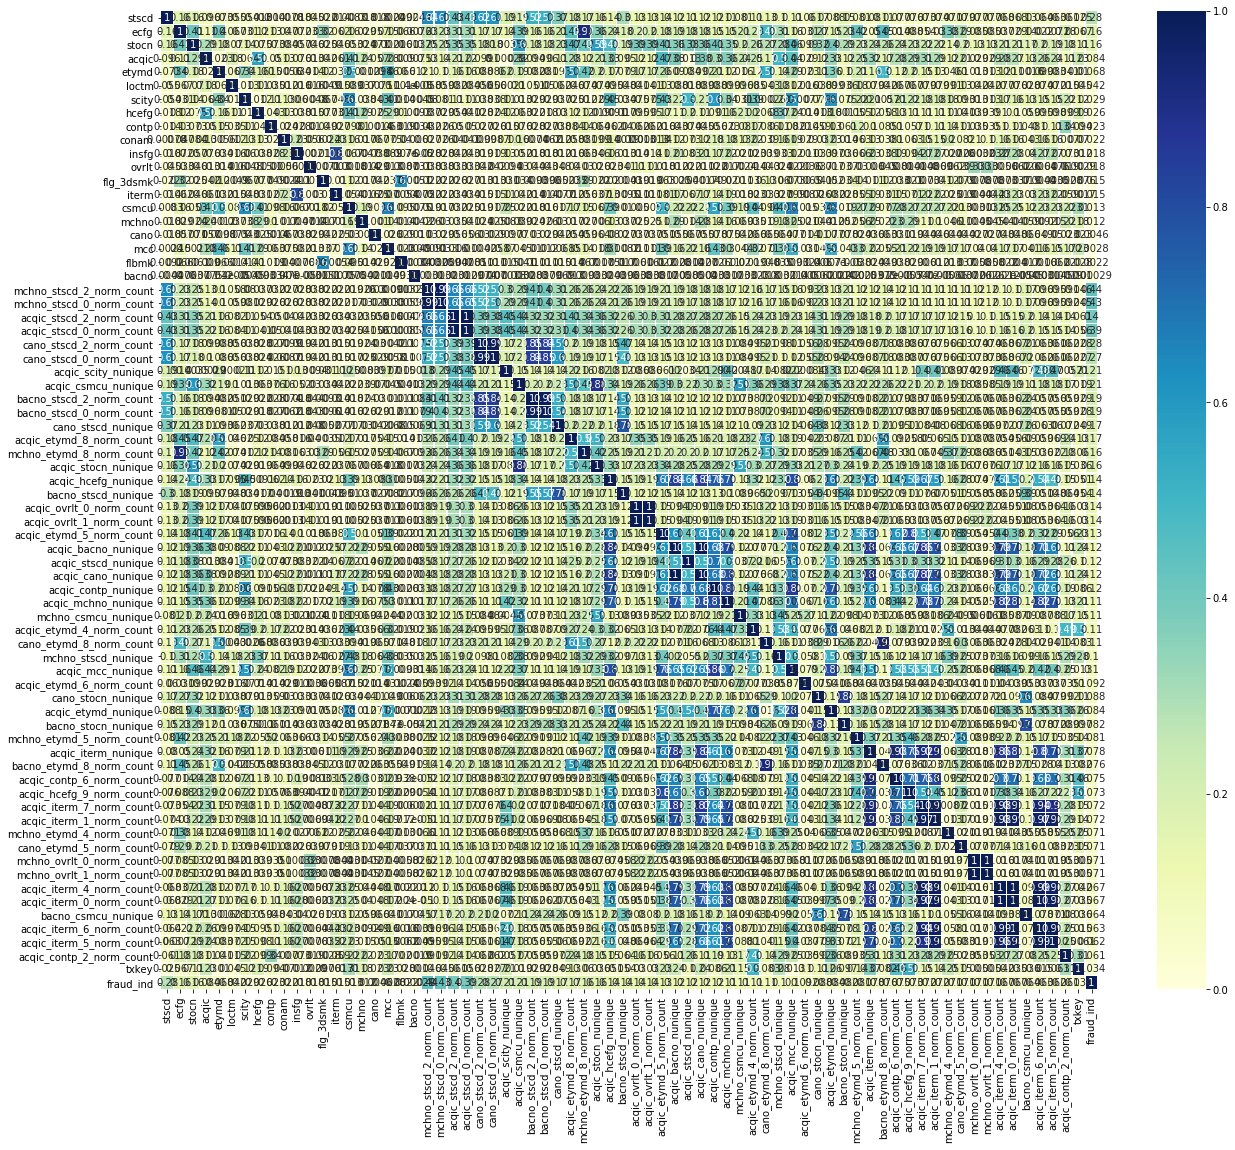

In [26]:
plt.figure(figsize=(21,18))
sns.heatmap(abs(train.corr()),linewidths=0.1,cmap='YlGnBu',annot=True)
plt.show()

可以看到原始特徵幾乎都是代碼編號等等沒有所謂共線問題,而新特徵是nunique&norm_count是數值特徵有大小意義也有共線問題

這裡想法是原始特徵用lightgbm去train,新特徵用ANN去train,預測其概率,最後接一個logistic做ensemble

# check data

In [27]:
print(train.shape)
print(train.isnull().sum().sum())
train.head()

(1521787, 72)
0


,stscd,ecfg,stocn,acqic,etymd,loctm,scity,hcefg,contp,conam,insfg,ovrlt,flg_3dsmk,iterm,csmcu,mchno,cano,mcc,flbmk,bacno,mchno_stscd_2_norm_count,mchno_stscd_0_norm_count,acqic_stscd_2_norm_count,acqic_stscd_0_norm_count,cano_stscd_2_norm_count,cano_stscd_0_norm_count,acqic_scity_nunique,acqic_csmcu_nunique,bacno_stscd_2_norm_count,bacno_stscd_0_norm_count,cano_stscd_nunique,acqic_etymd_8_norm_count,mchno_etymd_8_norm_count,acqic_stocn_nunique,acqic_hcefg_nunique,bacno_stscd_nunique,acqic_ovrlt_0_norm_count,acqic_ovrlt_1_norm_count,acqic_etymd_5_norm_count,acqic_bacno_nunique,acqic_stscd_nunique,acqic_cano_nunique,acqic_contp_nunique,acqic_mchno_nunique,mchno_csmcu_nunique,acqic_etymd_4_norm_count,cano_etymd_8_norm_count,mchno_stscd_nunique,acqic_mcc_nunique,acqic_etymd_6_norm_count,cano_stocn_nunique,acqic_etymd_nunique,bacno_stocn_nunique,mchno_etymd_5_norm_count,acqic_iterm_nunique,bacno_etymd_8_norm_count,acqic_contp_6_norm_count,acqic_hcefg_9_norm_count,acqic_iterm_7_norm_count,acqic_iterm_1_norm_count,mchno_etymd_4_norm_count,cano_etymd_5_norm_count,mchno_ovrlt_0_norm_count,mchno_ovrlt_1_norm_count,acqic_iterm_4_norm_count,acqic_iterm_0_norm_count,bacno_csmcu_nunique,acqic_iterm_6_norm_count,acqic_iterm_5_norm_count,acqic_contp_2_norm_count,txkey,fraud_ind
0,0,0,102,6862,0,61954,0,5,5,16158,0,0,0,0,0,59034,37846,457,0,112785,0.001044,0.998956,0.001344,0.998656,0.0,1.0,1,2,0.0,1.0,1,0.000000,0.000000,1,3,1,0.987376,0.012624,0.000000,30627,2,33807,1,720,2,0.000000,0.000000,2,2,0.0,5,1,5,0.000000,1,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.287500,0.985317,0.014683,0.000000,1.000000,3,0.00000,0.000000,0.000000,516056,0
1,0,0,102,0,2,38216,5795,0,5,13693,0,0,0,0,0,0,45476,451,0,133951,0.000016,0.997536,0.000000,0.994768,0.0,1.0,2,7,0.0,1.0,1,0.000000,0.000188,2,6,1,0.991720,0.008280,0.000000,19252,4,20139,3,188,4,0.000000,0.000000,3,23,0.0,1,3,1,0.049750,1,0.000000,0.000000,0.000000,0.000000,0.00000,0.028673,0.130435,0.992090,0.007910,0.000000,1.000000,2,0.00000,0.000000,0.000000,4376,0
2,0,0,102,6862,0,54640,0,5,5,16158,0,0,0,0,0,59034,187354,457,0,15350,0.001044,0.998956,0.001344,0.998656,0.0,1.0,1,2,0.0,1.0,1,0.000000,0.000000,1,3,1,0.987376,0.012624,0.000000,30627,2,33807,1,720,2,0.000000,0.000000,2,2,0.0,1,1,1,0.000000,1,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.388889,0.985317,0.014683,0.000000,1.000000,2,0.00000,0.000000,0.000000,483434,0
3,0,0,102,6697,5,62128,3267,5,5,40413,0,0,0,0,62,50185,29812,247,0,156492,0.000000,1.000000,0.000149,0.999643,0.0,1.0,101,2,0.0,1.0,1,0.142619,0.000000,1,9,1,0.988238,0.011762,0.312315,74622,3,84353,5,18121,1,0.304452,0.000000,1,126,0.0,1,6,1,0.455809,9,0.000000,0.020351,0.000482,0.002308,0.06066,0.525323,0.421053,0.987090,0.012910,0.008232,0.870099,1,0.00056,0.000227,0.008969,1407164,0
4,0,0,102,5959,4,65231,5795,5,5,25962,0,0,0,0,62,93290,80881,263,0,105534,0.000000,1.000000,0.000038,0.999894,0.0,1.0,34,2,0.0,1.0,1,0.077908,0.000000,1,7,1,0.990016,0.009984,0.206081,41913,3,46161,4,10568,1,0.447080,0.238095,1,130,0.0,1,6,1,0.000000,1,0.192308,0.000000,0.000094,0.000000,0.00000,1.000000,0.206349,1.000000,0.000000,0.000000,1.000000,2,0.00000,0.000000,0.158531,1051004,0


In [28]:
print(test.shape)
print(test.isnull().sum().sum())
test.head()

(421665, 71)
0


,stscd,ecfg,stocn,acqic,etymd,loctm,scity,hcefg,contp,conam,insfg,ovrlt,flg_3dsmk,iterm,csmcu,mchno,cano,mcc,flbmk,bacno,mchno_stscd_2_norm_count,mchno_stscd_0_norm_count,acqic_stscd_2_norm_count,acqic_stscd_0_norm_count,cano_stscd_2_norm_count,cano_stscd_0_norm_count,acqic_scity_nunique,acqic_csmcu_nunique,bacno_stscd_2_norm_count,bacno_stscd_0_norm_count,cano_stscd_nunique,acqic_etymd_8_norm_count,mchno_etymd_8_norm_count,acqic_stocn_nunique,acqic_hcefg_nunique,bacno_stscd_nunique,acqic_ovrlt_0_norm_count,acqic_ovrlt_1_norm_count,acqic_etymd_5_norm_count,acqic_bacno_nunique,acqic_stscd_nunique,acqic_cano_nunique,acqic_contp_nunique,acqic_mchno_nunique,mchno_csmcu_nunique,acqic_etymd_4_norm_count,cano_etymd_8_norm_count,mchno_stscd_nunique,acqic_mcc_nunique,acqic_etymd_6_norm_count,cano_stocn_nunique,acqic_etymd_nunique,bacno_stocn_nunique,mchno_etymd_5_norm_count,acqic_iterm_nunique,bacno_etymd_8_norm_count,acqic_contp_6_norm_count,acqic_hcefg_9_norm_count,acqic_iterm_7_norm_count,acqic_iterm_1_norm_count,mchno_etymd_4_norm_count,cano_etymd_5_norm_count,mchno_ovrlt_0_norm_count,mchno_ovrlt_1_norm_count,acqic_iterm_4_norm_count,acqic_iterm_0_norm_count,bacno_csmcu_nunique,acqic_iterm_6_norm_count,acqic_iterm_5_norm_count,acqic_contp_2_norm_count,txkey
1521787,0,0,102,6862,0,77950,0,5,5,16158,0,0,0,0,0,59060,116168,457,0,162489,0.00193,0.99807,0.001344,0.998656,0.181818,0.818182,1,2,0.181818,0.818182,2,0.0,0.0,1,3,2,0.987376,0.012624,0.0,30627,2,33807,1,720,2,0.0,0.0,2,2,0.0,1,1,1,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.97819,0.02181,0.0,1.0,1,0.0,0.0,0.0,592489
1521788,0,0,102,6862,0,79549,0,5,5,16158,0,0,0,0,0,59060,116168,457,0,162489,0.00193,0.99807,0.001344,0.998656,0.181818,0.818182,1,2,0.181818,0.818182,2,0.0,0.0,1,3,2,0.987376,0.012624,0.0,30627,2,33807,1,720,2,0.0,0.0,2,2,0.0,1,1,1,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.97819,0.02181,0.0,1.0,1,0.0,0.0,0.0,592452
1521789,0,0,102,6862,0,60355,0,5,5,16158,0,0,0,0,0,59060,116168,457,0,162489,0.00193,0.99807,0.001344,0.998656,0.181818,0.818182,1,2,0.181818,0.818182,2,0.0,0.0,1,3,2,0.987376,0.012624,0.0,30627,2,33807,1,720,2,0.0,0.0,2,2,0.0,1,1,1,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.97819,0.02181,0.0,1.0,1,0.0,0.0,0.0,590212
1521790,0,0,102,6862,0,60296,0,5,5,16158,0,0,0,0,0,59060,116168,457,0,162489,0.00193,0.99807,0.001344,0.998656,0.181818,0.818182,1,2,0.181818,0.818182,2,0.0,0.0,1,3,2,0.987376,0.012624,0.0,30627,2,33807,1,720,2,0.0,0.0,2,2,0.0,1,1,1,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.97819,0.02181,0.0,1.0,1,0.0,0.0,0.0,590209
1521791,0,0,102,6862,0,77933,0,5,5,16158,0,0,0,0,0,59060,116168,457,0,162489,0.00193,0.99807,0.001344,0.998656,0.181818,0.818182,1,2,0.181818,0.818182,2,0.0,0.0,1,3,2,0.987376,0.012624,0.0,30627,2,33807,1,720,2,0.0,0.0,2,2,0.0,1,1,1,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.97819,0.02181,0.0,1.0,1,0.0,0.0,0.0,592488


# save

確認檔案名稱是否正確

In [0]:
train.to_csv("/content/drive/My Drive/玉山人工智慧比賽數據/train_特徵工程完.csv")
test.to_csv("/content/drive/My Drive/玉山人工智慧比賽數據/test_特徵工程完.csv")
print('save done!')

save done!
